In [1]:
"""El dataset3_train contiene 1000 vectores etiquetados. Las dos primeras columnas son
las componentes de los vectores y la tercera columna las etiquetas correspondientes a 1
de 3 clases. Utilice estos 1000 puntos para construir un clasificador k-NN con k = 5.
Posteriormente, utilice los 200 puntos del dataset3_test para evaluar el clasificador
entrenado. Genere una gráfica mostrando las fronteras de decisión del clasificador.
Muestre la matriz de confusión asociada a la evaluación de su clasificador y el reporte
de clasificación que se obtiene con los 200 puntos de prueba. Añada la gráfica, la matriz
de confusión y el reporte de clasificación en su archivo"""

'El dataset3_train contiene 1000 vectores etiquetados. Las dos primeras columnas son\nlas componentes de los vectores y la tercera columna las etiquetas correspondientes a 1\nde 3 clases. Utilice estos 1000 puntos para construir un clasificador k-NN con k = 5.\nPosteriormente, utilice los 200 puntos del dataset3_test para evaluar el clasificador\nentrenado. Genere una gráfica mostrando las fronteras de decisión del clasificador.\nMuestre la matriz de confusión asociada a la evaluación de su clasificador y el reporte\nde clasificación que se obtiene con los 200 puntos de prueba. Añada la gráfica, la matriz\nde confusión y el reporte de clasificación en su archivo'

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
#Definimos k
k= 5

In [5]:
dataset3_train = pd.read_csv('dataset3_train.csv', header=None)
dataset3_test = pd.read_csv('dataset3_test.csv', header=None)

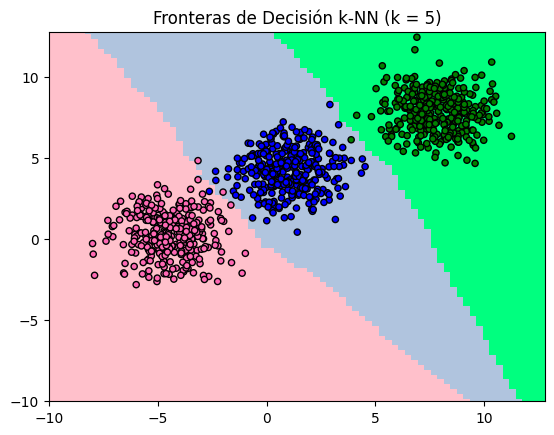

Matriz de Confusión:
[[66  1  0]
 [ 1 66  0]
 [ 0  0 66]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.99      0.99      0.99        67
           2       1.00      1.00      1.00        66

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [16]:

# Separamos los datos en características (X) y etiquetas (y)
X_entrenamiento, y_entrenamiento = dataset3_train.iloc[:, :2], dataset3_train.iloc[:, 2]
X_prueba, y_prueba = dataset3_test.iloc[:, :2], dataset3_test.iloc[:, 2]
#El .iloc de: https://www.askpython.com/python/built-in-methods/python-iloc-function

# KNN y entrenamiento
knn_pro = KNeighborsClassifier(n_neighbors=k)
knn_pro.fit(X_entrenamiento, y_entrenamiento)

# predicciones
y_pred = knn_pro.predict(X_prueba)


# Fronteras de decisión

#Colorcitos
cmap_light = ListedColormap(["lightsteelblue", "pink", "springgreen"])
cmap_bold = ListedColormap(["blue", "hotpink", "green" ])

#Límites
x_min, x_max = -10, 13
y_min, y_max = -10, 13


matriz_x, matriz_y = np.meshgrid(np.arange(x_min, x_max,0.3), np.arange(y_min, y_max,0.3))
#np.meshgrid: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
Z = knn_pro.predict(np.c_[matriz_x.ravel(), matriz_y.ravel()])
# np.ravel de: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
Z = Z.reshape(matriz_x.shape)

#Grafiquita
plt.figure()
plt.pcolormesh(matriz_x, matriz_y, Z, cmap=cmap_light)
plt.scatter(X_entrenamiento.iloc[:, 0], X_entrenamiento.iloc[:, 1], c=y_entrenamiento, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(matriz_x.min(), matriz_x.max())
plt.ylim(matriz_y.min(), matriz_y.max())
plt.title("Fronteras de Decisión")
plt.show()

# matriz de confusión
matriz_con = confusion_matrix(y_prueba, y_pred)
print("Matriz de Confusión:")
print(matriz_con)

# Reporte de clasificación
reporte_clasi = classification_report(y_prueba, y_pred)
print("\nReporte de Clasificación:")
print(reporte_clasi)
